In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from tqdm import tqdm
from tqdm.autonotebook import tqdm


C:\Users\miche\AppData\Local\Temp\ipykernel_8464\2021721994.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Functions ###

In [5]:
def stacking_uw_plot(outfile_path: str, data: np.ndarray, step_wf_to_plot, time, remove_starting_noise, highlight_start, highlight_end, time_ticks_waveforms, ylim_plot, xlim_plot, formato):
    outfile_name = outfile_path.split('\\')[-1]
    f = plt.figure(figsize = (13,4))
    plt.title("Stacked Waveforms of " + outfile_name, fontsize = 12)
    for wf in range(0,len(data), step_wf_to_plot):
        plt.plot(time[remove_starting_noise:], data[wf][remove_starting_noise:], color = 'black', linewidth = 0.8, alpha = 0.5)
    plt.plot(time[highlight_start:highlight_end], data[wf][highlight_start:highlight_end], color = 'red')
    plt.xlabel('Time [$\mu s$]', fontsize = 12)
    plt.ylabel('Amplitude [.]', fontsize = 12)
    plt.xticks(time_ticks)
    plt.ylim(-ylim_plot,ylim_plot)
    plt.xlim(time[0], xlim_plot)
    plt.grid(alpha = 0.1)
    plt.savefig(outfile_path + formato, dpi = 300)
    plt.close()
    #print(outfile_path)
    
def amplitude_map(outfile_path,data, amp_scale, formato) -> None:
    outfile_name = outfile_path.split('\\')[-1]
    fig,ax1 = plt.subplots(ncols=2,figsize=(15,8))
    ax1 = plt.subplot()
    ax1.set_title('Amplitude Map of ' + outfile_name, fontsize = 12)
    cmap = plt.get_cmap('seismic')
    im = ax1.imshow(data, aspect='auto',origin='upper',interpolation='none',cmap = cmap, vmin = -amp_scale, vmax = amp_scale)
    
    cbar= fig.colorbar(im,pad=0.04)
    cbar.set_label("Relative Amplitude", fontsize = 14)

    ax1.set_xlabel('Wf_time [$\mu s$]', fontsize = 12)
    ax1.set_ylabel('Wf_number ', fontsize = 12)
    ax1.set_xscale

    fig.tight_layout()
    
    plt.savefig(outfile_path + formato, dpi = 300)
    plt.close()
    
def handling_empty_lines(infile, encoding, number_of_samples) -> list[list[str]]:
    data_list = []             
    for line in infile:
        line = line.decode(encoding)
        line = line.split("\t")
        if len(line) < number_of_samples:   #The empty lines are surely shorter than wf lines (determined by the number of samples)
            continue
        data_list.append(line)
    return data_list

### Main code ###

Opening files:   0%|          | 0/10 [00:00<?, ?it/s]

PIS1_PIS2_ramp015_1cmdiocane
PIS1_PIS2_ramp015_1cm_2diocane
PIS1_PIS2_ramp015_1cm_3diocane
PIS1_PIS2_ramp015_1cm_4diocane
PIS1_PIS2_ramp015_1cm_5_holddiocane
PIS1_PIS2_ramp015_1cm_6diocane
PIS1_PIS2_ramp015_1cm_7diocane
PIS1_PIS2_ramp015_1cm_8diocane
PIS1_PIS2_ramp015_1cm_9diocane


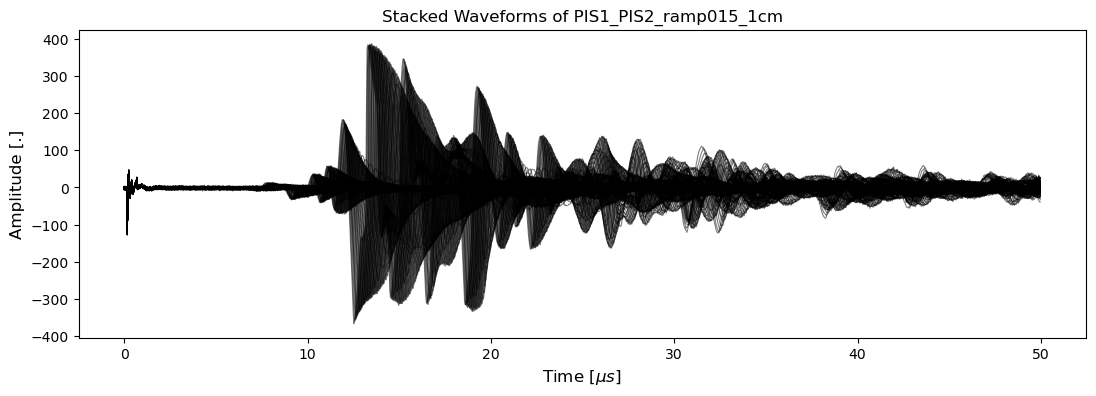

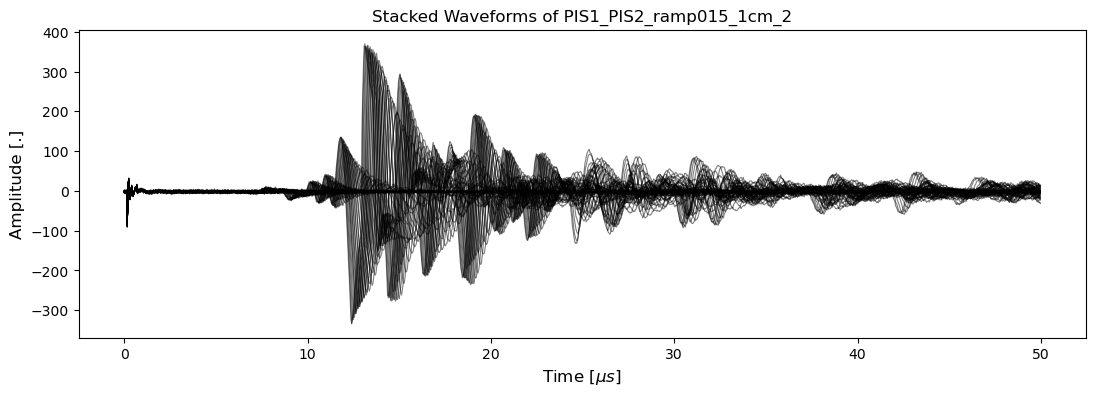

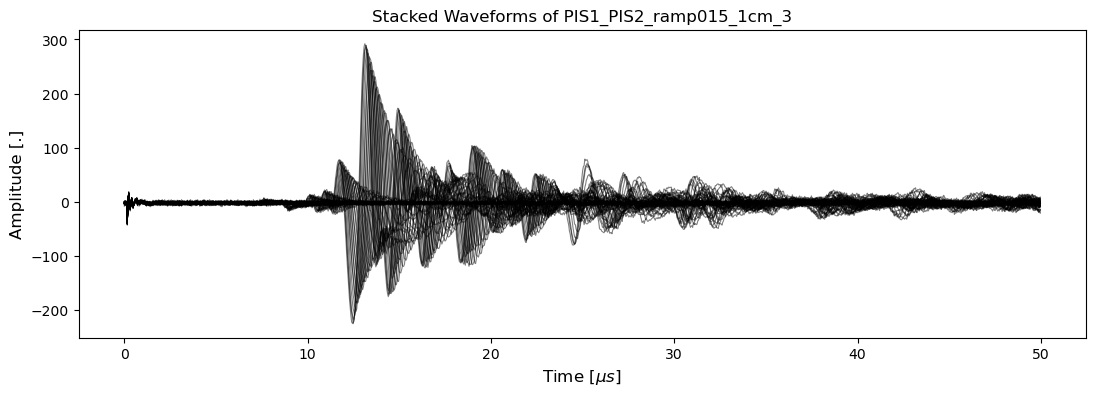

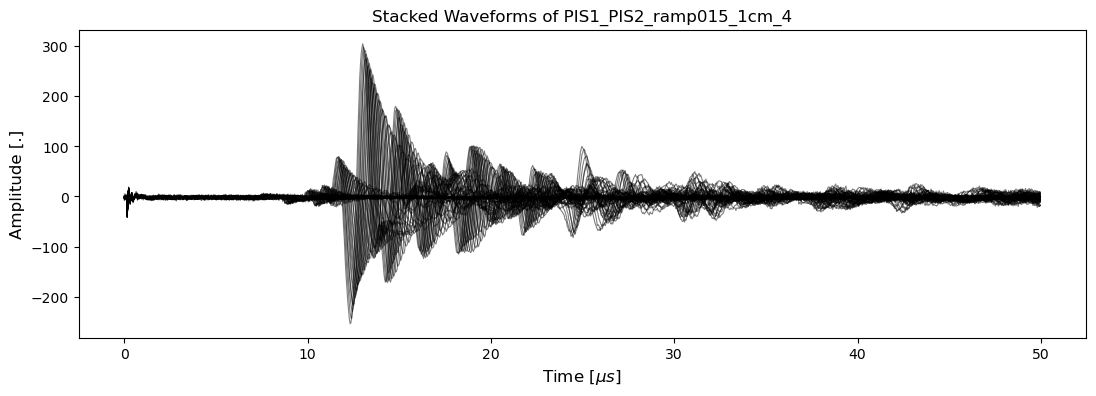

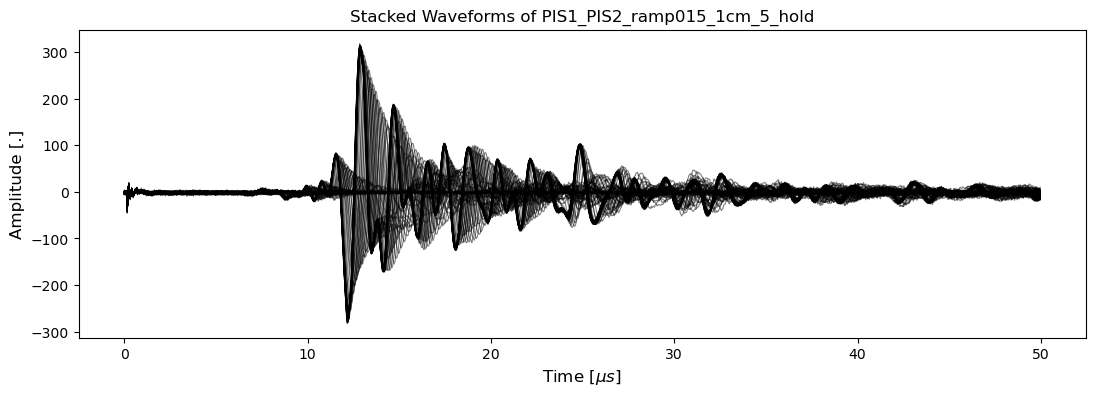

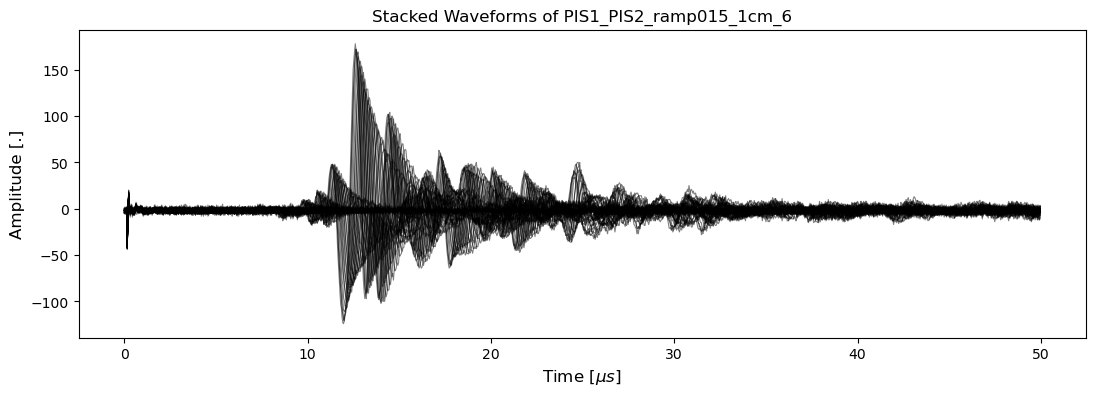

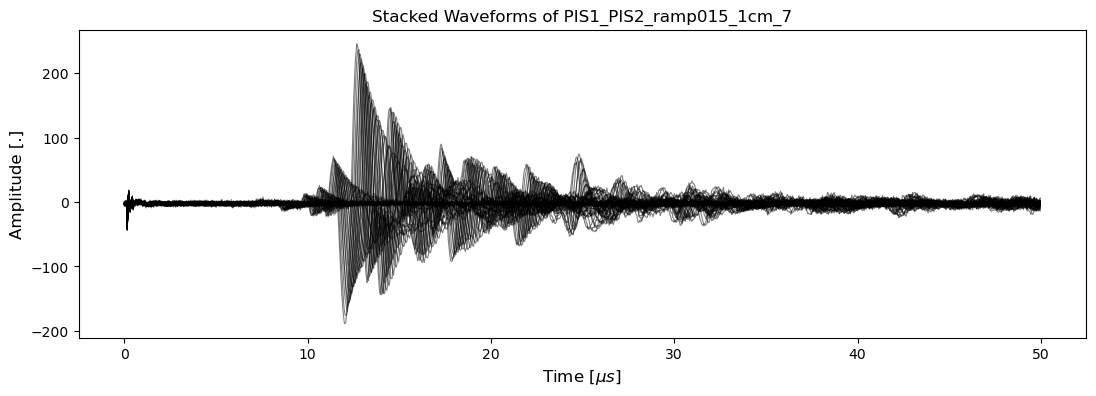

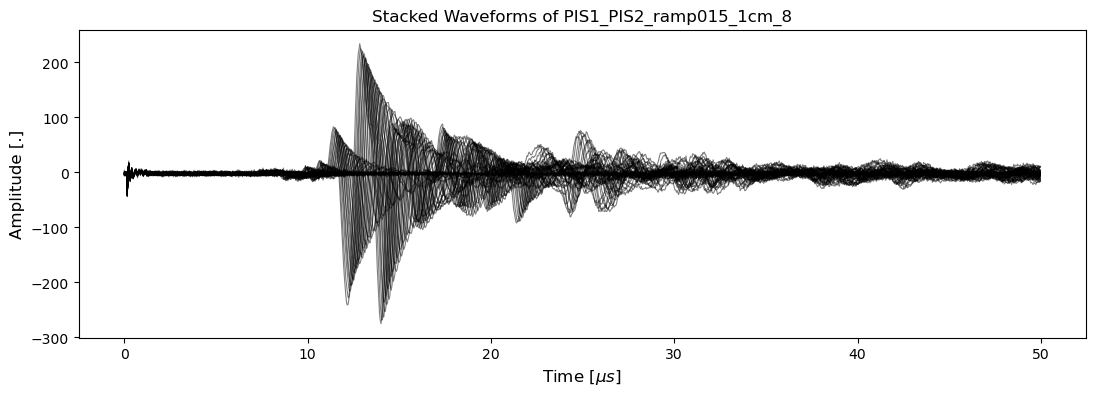

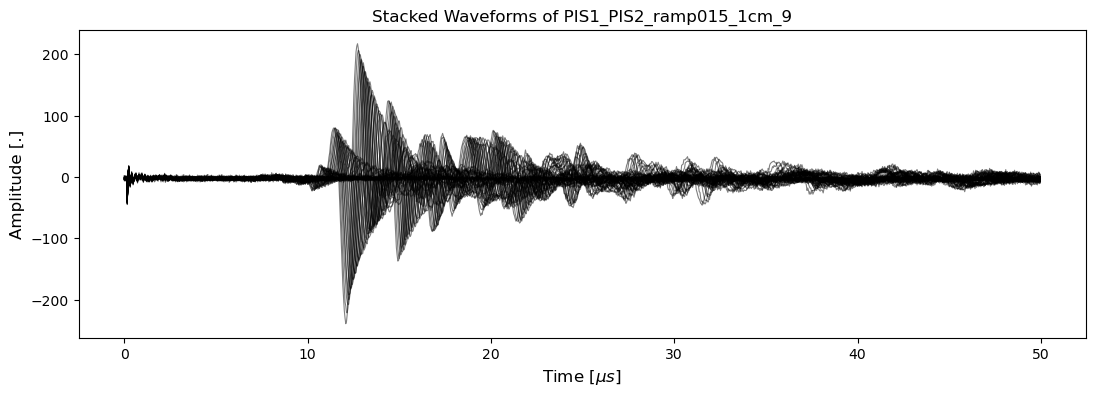

In [6]:
percorso = os.getcwd()
percorso

#INPUT and OUTPUT FOLDERS
test_dir_path = 'C:\\Users\\miche\\Documents\\Università\\PhD\\experiments_uw\\s0096\\data_tsv' 

outdir_name = "images"
outdir_waveforms = "waveforms"
outdir_amplitude = "amplitude_maps"
outdir_path_waveforms = os.path.join(test_dir_path,outdir_name, outdir_waveforms)
outdir_path_amplitude = os.path.join(test_dir_path,outdir_name, outdir_amplitude)


if not (os.path.exists(outdir_path_waveforms) or os.path.exists(outdir_path_amplitude)):
    os.makedirs(outdir_path_waveforms)
    os.makedirs(outdir_path_amplitude)    

formato = '.png'

### Some plot features ###
row_to_plot = 200  #which waveform to plot
remove_starting_noise = 0
highlight_start = 0
highlight_end = 0
ylim_plot = 500
xlim_plot= 20
ticks_steps_waveforms = 1 #[microseconds] plot ticks 
step_wf_to_plot = 10  #more waveforms on the same plot
amp_scale = 300  #color map for amplitude scale

### METADATA ###
encoding = 'iso8859' #read greek letters             
    
for infile_name in tqdm(iterable=os.listdir(test_dir_path), desc='Opening files'):
    extension = infile_name.split('.')[-1]
    if extension == 'tsv': #DISCARD EUR AND INI FILES
        #print(infile_name)
        ### IMPORT DATA ###
        file_path = os.path.join(test_dir_path, infile_name)
        # data = pd.read_csv(file_path, encoding = encoding, sep = '\t', skiprows = 4, header = None).dropna()
        with open(file_path,"rb") as infile:
            general = next(infile).decode(encoding)
            amplitude_scale = next(infile).decode(encoding)
            time_scale = next(infile).decode(encoding)
           #  print(time_scale)           # check what is going on below
            stupid_scale = next(infile).decode(encoding)
            # DEFINE TIME SCALE USING METADATA
            time_info = re.findall(r"\d+\.*\d*",time_scale)   # find all float in the string "time_scale" using regular expression:
                                                        # the first argument of findall must be a "regular expression". It start with an r so
                                                        # is an r-string, that means "\" can be read as a normal character
                                                        # The regular expression "\d+\.*\d*" means "match all the digits that are adiacent as
                                                        # a single entry and, if they are followed by a dot and some other digits, they are still
                                                        # the same numbers". So it gets as a single number both 1, 10, 1.4, 10.42 etc.
            time_info = [float(entry) for entry in time_info]           # just convert the needed info in float number
            time = np.arange(time_info[0],time_info[1],time_info[3])
            number_of_samples = time_info[2]
            time_ticks_waveforms = np.arange(time[0], time[-1], ticks_steps_waveforms)
            
            data_list = handling_empty_lines(infile, encoding, number_of_samples)
            
            data = np.array(data_list).astype(float)  #convert list in array
                
            
            #CHOOSE THE FILE PATH OF THE OUTPUT
            infile_name = infile_name.split('.')[0]    # remove extension
            outfile_path_waveforms = os.path.join(outdir_path_waveforms, infile_name)
            outfile_path_amplitude = os.path.join(outdir_path_amplitude, infile_name)

                ### PLOT DATA ###
            stacking_uw_plot(outfile_path_waveforms, data, step_wf_to_plot, time, remove_starting_noise, highlight_start, highlight_end, time_ticks_waveforms, ylim_plot, xlim_plot, formato)
            amplitude_map(outfile_path_amplitude,data, amp_scale, formato)
            try:
                stacking_uw_plot(outfile_path_waveforms, data, step_wf_to_plot, time, remove_starting_noise, highlight_start, highlight_end, time_ticks_waveforms, ylim_plot, xlim_plot, formato)
                amplitude_map(outfile_path_amplitude,data, amp_scale, formato)
            except:
                print(infile_name + "diocane")